<a href="https://colab.research.google.com/github/urvashiverma2608/Projectsecure/blob/master/Practical_2_RandomForests_GridSearch_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical 2 

# Part I. Random Forests, ROC analysis and Grid Search


## Random Forests

Ensemble learning is the technique of building multiple models, and then combining them in a manner that is likely to produce better results than individual models.  These models don't have to be classifiers, and can be trained to deal with most tasks. A Random Forest uses one type of ensemble method called bagging to learn multiple decision trees. This forest of Decision Trees is then used to predict the output value by avaraging or voting. As to esnure diversity among various trees, each Decision Tree is constructed using a boostrap sample of the training data, and only a random subset of variables is used at each node. 

RandomForestClassifier docs: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier



Next we will work with the Wisconsin breast cancer diagnosis dataset that consists of some input variables about the morphological features of the breast mass and a target variable of 2 classes for the type of the tumor (benign-0 or malignant-1). 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


In [2]:
brc = load_breast_cancer()
print(brc.DESCR)
X = brc.data
y = brc.target

# Variable names
vnames = brc.feature_names

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
# Have a quick look at the data, e.g. the shape of input and output, and some descriptive statistics
# Your code 
#
import pandas as pd
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Split the data into training and test for hold-out cross-validation

Note: 

*   stratify = y to make sure all split of the data have got the same class distribution

*   by fixing the random_state, the same training/test split can be obtained (this will be useful for reproducibility) each time you run the code. If the data set is small, one can consider repeat the hold out cross-validation several times with different split. 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state = 21, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(341, 30) (341,)
(228, 30) (228,)


https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.99      0.93      0.96        85
           1       0.96      0.99      0.98       143

    accuracy                           0.97       228
   macro avg       0.97      0.96      0.97       228
weighted avg       0.97      0.97      0.97       228



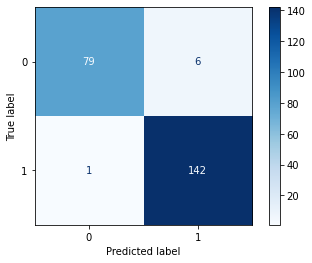

In [5]:
# Create a random forest classifier 
# 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
rfc = RandomForestClassifier(n_estimators=100, random_state=21)
rfc.fit(X_train, y_train)
y_test_pred = rfc.predict(X_test)

# Check the confusion matrix
disp = plot_confusion_matrix(rfc, X_test, y_test,
                                 display_labels=None,
                                 cmap=plt.cm.Blues)

# Just get a classification report.
print(classification_report(y_test, y_test_pred))

Exercise: 

Check the training performance for the model. 
How does your model perform, is it overfitted? 

In [6]:
# Your code here get check training performance


It gives high true positive and true negative values which means this model is exactly fitting the training. So, overfitting. 
Also, accuracy, precision and F1 all are high in value (almost 1). 

## Performance measures and ROC analysis

Read the slides on blackboard on performance measures and ROC analysis. 

or check the scikit-learn doc https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics

or See https://en.wikipedia.org/wiki/Receiver_operating_characteristic
for more detailed description on performance measures for binary classification. 

But before we do this, we must first venture into the wonderfully simplistic, yet incredibly powerful **Confusion Matrix**, as we already see in the practical. In case of binary classification, it is comprised of a single table with 4 combinations of predicted and actual values. 

- **True Positive/TP:** You have predicted positive, and that is indeed the case.
- **True Negative/TN:** You have predicted negative, amd that is indeed the case.
- **False Positive/FP/Type 1 Error:** You have predicted positive, where the case is actually negative.
- **False Negative/FN/Type 2 Error:** You have predicted negative, where the case is actually positive.

Using this simple metric, we are able to calculate an array of performance metrics. For example:

$$Recall = {TP \over{TP + FN}}$$

Which calculates how many classes were correctly predicted for the positive task.

$$Precision = {TP \over{TP + FP}}$$

Which calculates how many classes were correctly predicted for the negative task.

$$F-measure = {2*(Recall*Precision) \over{Recall + Precision}}$$

Uses the harmonic mean to punish the extreme values more, where two models with low precision and high recall (or vice versa).

The major calculations are the **true positive rate** or **sensitivity**:

$$TPR = {TP \over{TP+FN}}$$

The **false positive rate**:

$$FPR = {FP \over{FP+TN}}$$

And the **specificity**:

$$Specificity = {TN \over{TN+FP}}$$


The **Reciever Operating Characteristic** (ROC) curve and the **Area Under the Cuve** (AUC) are very popular for evaluating the performance of binary classification models. 

ROC curve is constructed by plotting false positive rate vs true positive rate (specificity) at various threshold settings (for a continuous output, e.g. the probabilty output given by a decision tree model). AUC is the area under the curve. The best possible model has an AUC of 1, which means that it has a good mesaure of seperability. 0 means that the model has a worst measure of seperability, and where AUC is 0.5 it illustrates that the model has zero class seperation capacity whatsoever.

You can see an example on [how to plot ROC curves in scikit-learn]( 
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html#sklearn.metrics.plot_roc_curve)
or [ROC curves with cross-validation](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py)

Alternatively for lower version of scikit-learn, the example plot ROC in python can be found below:

**Note:** This only works for binary classification tasks.

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_auc_and_roc(y_true, scores, col='red'):
    fpr, tpr, _ = roc_curve(y_true, scores)
    calc_auc = auc(fpr, tpr)
        
    plt.title("Recieving Operating Characteristic")
    plt.plot(fpr, tpr, col, label="AUC %0.3f" % calc_auc)
    plt.plot([0, 1], [0, 1], "b--")
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.legend(loc="lower right")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

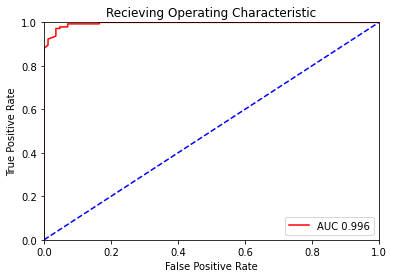

In [8]:
from sklearn.metrics import roc_auc_score, plot_roc_curve
# only return the probability prediction for class 1
y_test_prob = rfc.predict_proba(X_test)[:,1]
plot_auc_and_roc(y_test, y_test_prob)

## Exercise: 

DecisionTreeClassifier has got an attribute "estimators_", which is the list of individual decision trees in the forests. Randomly pick two trees to visualise. 

In [10]:
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import SVG

def visualise_tree(treeclf):
    dot = export_graphviz(treeclf, filled=True, rounded=True)
    graph = graphviz.Source(dot)
    display(SVG(graph.pipe(format="svg")))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8947368421052632


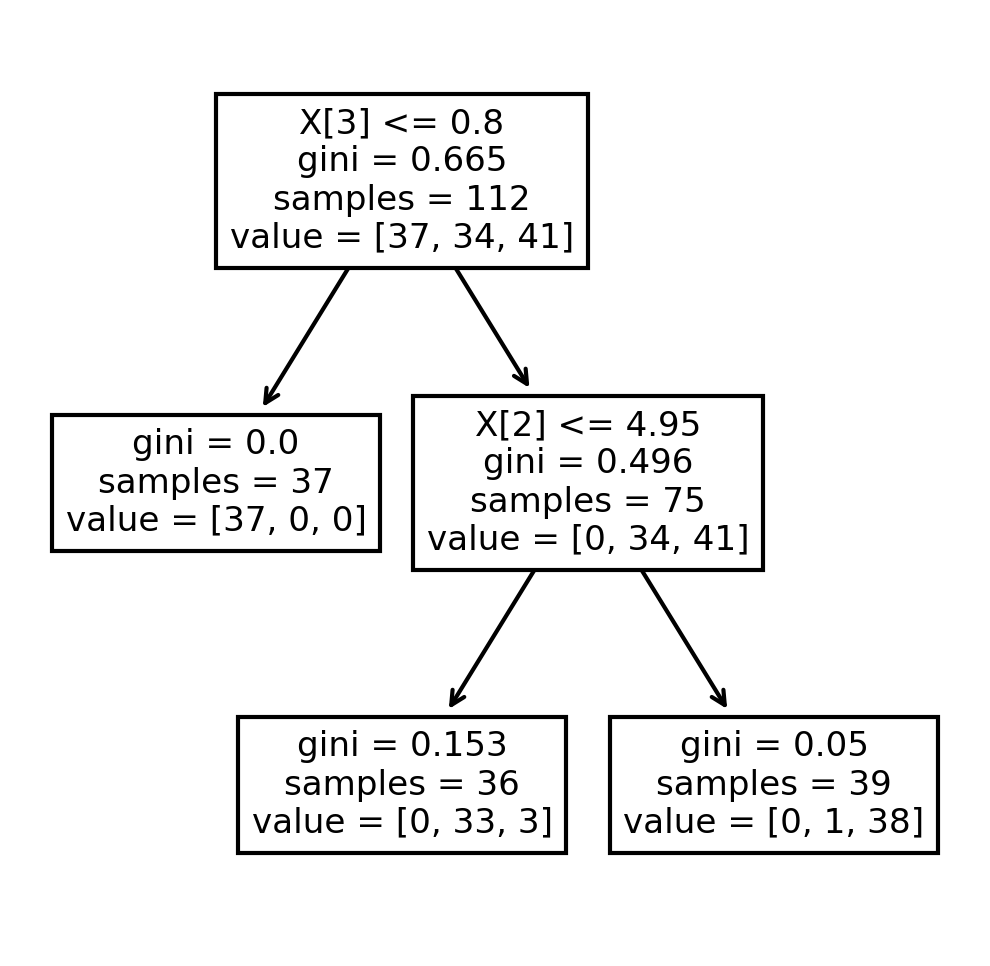

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()
X_train, X_test, Y_train, Y_test = train_test_split(df[data.feature_names], df['target'], random_state=0)
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)
clf.fit(X_train, Y_train)
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, 
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, 
                       random_state=0, splitter='best')
clf.predict(X_test.iloc[0].values.reshape(1, -1))
clf.predict(X_test[0:10])
score = clf.score(X_test, Y_test)
print(score)
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(clf);


1.0.2


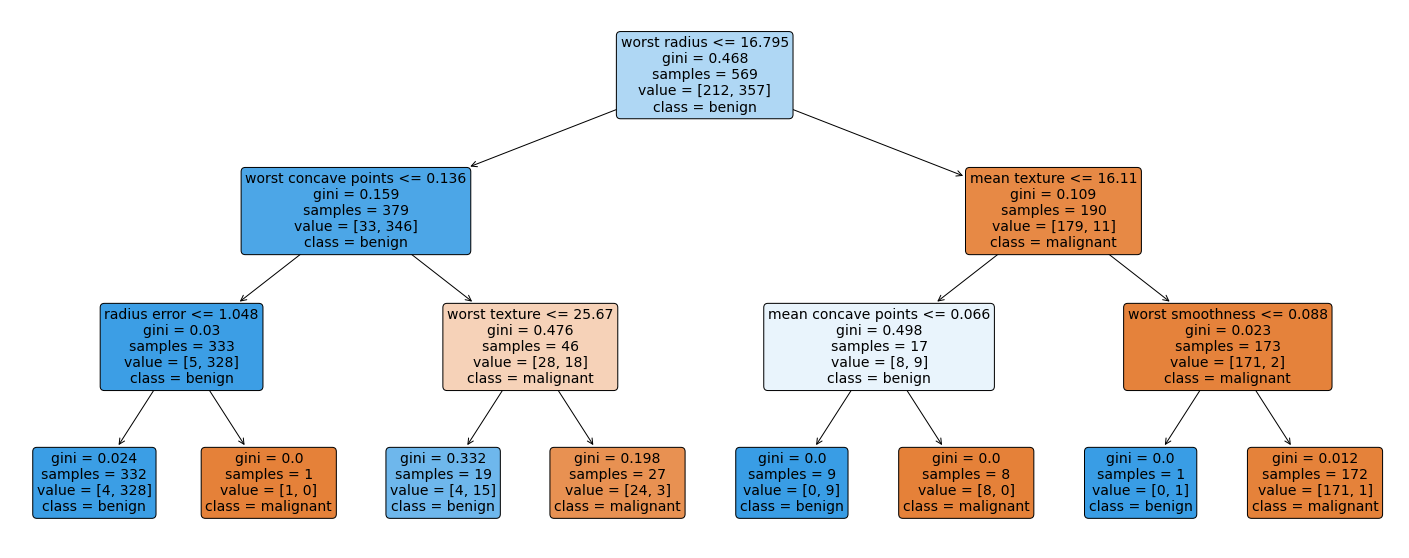

In [26]:
import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


# check for the sklearn version, it has to be 0.21
import sklearn
print(sklearn.__version__)
breast_cancer = datasets.load_breast_cancer()
clf = DecisionTreeClassifier(max_depth=3) #max_depth is maximum number of levels in the tree
clf.fit(breast_cancer.data, breast_cancer.target)

plt.figure(figsize=(25,10))
a = plot_tree(clf, 
              feature_names=breast_cancer.feature_names, 
              class_names=breast_cancer.target_names, 
              filled=True, 
              rounded=True, 
              fontsize=14)

## Hyperparameter tuninng using GridSearch

According to Wikipedia;

"The traditional way of performing hyperparameter optimisation has been grid search, or a parameter sweep, which is simply an exhaustive searching through a manually specified subset of the hyperparameter space of a learning algorithm. A grid search algorithm must be guided by some performance metric, typically measured by cross-validation on the training set or evaluation on a held-out validation set."

When tasked with building classifiers, it is not always possible to know what the best parameters are. It is not feasible to "brue-force" parameters manually, so we make use of grid search. Grid Search provides us the abilit to specify a range of values from which classifiers can be built and evaluated using to find out the best combintation of parameters.

Below is some example code for grid search. Define your own parameter grid and choose the 'best' hyperparameters, and refit the RF classifier to your training data, and report the test performance. 

GridSearch doc: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [31]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
from sklearn.model_selection import GridSearchCV
# use a full grid over all parameters
param_grid = {'n_estimators': [1], "max_depth" : [2, 8]}

# run grid search
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=5)

         

In [ ]:
# Your code here
# Question: what is the performance metric used by default in GridSearchCV? 
#      Hint: check the parameter scoreing in documentation
#  By default , its none. Here, the two parameters use a dictinary with key value pairs [1], [2,8]. 

In [ ]:
# Repeat the grid search above but choose a different metric e.g. AUC to score
# Your code here
#


If you have time, 

1.  Apply random forests on Titanc data
2.  Check the feature_importance_ in the fitted RF classifier. RF's impurity based variable importantance can be used to rank the features, however with some caveat. Please see 
[this](https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-py)
for experiments illustrating the issues of RF feature importance score for variables with high number of values.
and [this](https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance_multicollinear.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-multicollinear-py), for general feature selection issues when many variables are highly correlated. 

# Part II. Inclass Kaggle challenge

The challenage will be released today but you have three weeks complete this task and to submit a prediction for automated sign-off. 

Register for Kaggle using your Aberystwyth University, using your AU email address. But do change your one person Team name in Kaggle with a nick name for fun and for your own privacy.

https://www.kaggle.com

Log in and follow the link to join the inclass competition:

https://www.kaggle.com/t/5af11d013f254d3fbb32c1eca0d86ecc

A major part of these practicals are to help you go out and do this for yourself. That being said, we do expect you to achieve the following:

1. Load in the data, explore the data. Transform data data into a format that a machine learning technique can use.

2. Might need to further split the training set into train/validation sets (depending on the sample size of the data with labels and problem at hand. Due to time limit in the class, you may skip this step for today's exercise).

3. On the training set, use model selection and some automated hyperparameter tuning techniques (such as grid search or randomized search, see https://scikit-learn.org/stable/modules/grid_search.html) to select a 'best' model (i.e. the model type and the relevant hyperparameters with best performance). Initially, you might start with select one simple model and use the default settings or manual selected hyperparameters, in order to have some rough idea on problem at hand.

4. Evaluate the model using an appropriate form of cross-validation, in this case providing the AUC metrics and ROC curves with cross-validation or on the validation set (if made available in the Step2). Is the performance good enough? If not go back to step 3, or repeat step 4 with a different model type and/or hyperparemters.

5. Refit the 'best' model (model type and the relevant hyperparameters) to all the training data, then make prediction with probability output on the test set, save the results to a file in an appropriate format.

6. Submit the prediction file to Kaggle inclass competition.

7. Repeat the procedure from step 3, and see if you can improve the external public validation performance.
